In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

# For handling warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/My Drive/customer_churn_data.csv')


In [ ]:
# Display the first few rows of the dataset
print(data.head())

   CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
0           1   49    Male       4           88.35  Month-to-Month   
1           2   43    Male       0           36.67  Month-to-Month   
2           3   51  Female       2           63.79  Month-to-Month   
3           4   60  Female       8          102.34        One-Year   
4           5   42    Male      32           69.01  Month-to-Month   

  InternetService  TotalCharges TechSupport Churn  
0     Fiber Optic        353.40         Yes   Yes  
1     Fiber Optic          0.00         Yes   Yes  
2     Fiber Optic        127.58          No   Yes  
3             DSL        818.72         Yes   Yes  
4             NaN       2208.32          No   Yes  


#Exploratory Data Analysis

The goal of exploratory data analysis (EDA) is to explore and visualize mobile usage patterns to gain insights into user behavior. This includes analyzing gender-based differences in app usage, screen-on time, and battery drain, along with understanding how age and device models (Android vs iOS) impact these metrics.

<ipython-input-36-85bd3bfe1cb8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='App Usage Time (min/day)', data=data, palette=colors)
<ipython-input-36-85bd3bfe1cb8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Screen On Time (hours/day)', data=data, palette=colors)
<ipython-input-36-85bd3bfe1cb8>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Battery Drain (mAh/day)', data=data, palette=colors)


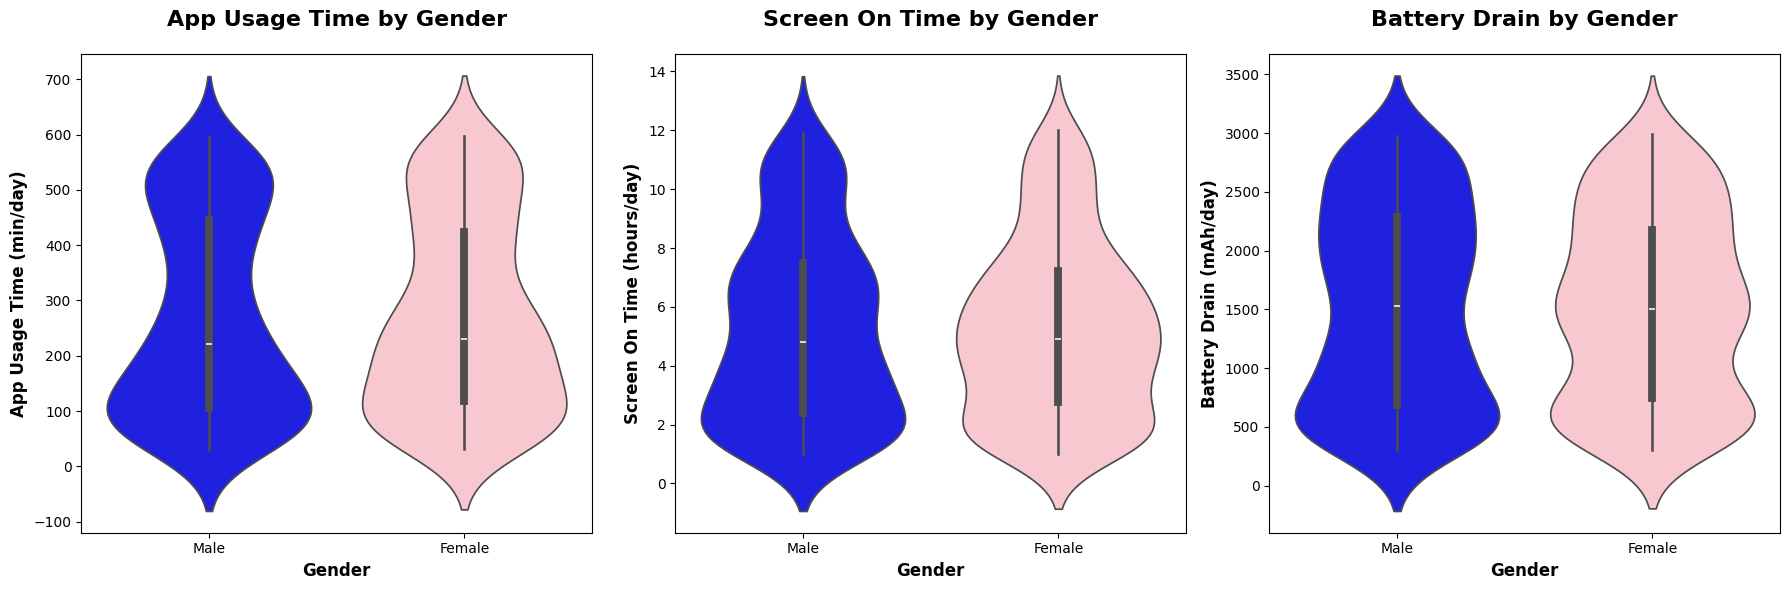

In [ ]:
# 1. Gender-based usage patterns
plt.figure(figsize=(18, 6))

# Define custom colors for gender
colors = {'Male': 'blue', 'Female': 'pink'}

# Violin plot of App Usage Time by Gender
plt.subplot(1, 3, 1)
sns.violinplot(x='Gender', y='App Usage Time (min/day)', data=data, palette=colors)
plt.title('App Usage Time by Gender', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12, fontweight='bold')
plt.ylabel('App Usage Time (min/day)', fontsize=12, fontweight='bold')

# Violin plot of Screen On Time by Gender
plt.subplot(1, 3, 2)
sns.violinplot(x='Gender', y='Screen On Time (hours/day)', data=data, palette=colors)
plt.title('Screen On Time by Gender', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12, fontweight='bold')
plt.ylabel('Screen On Time (hours/day)', fontsize=12, fontweight='bold')

# Violin plot of Battery Drain by Gender
plt.subplot(1, 3, 3)
sns.violinplot(x='Gender', y='Battery Drain (mAh/day)', data=data, palette=colors)
plt.title('Battery Drain by Gender', pad=20, fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12, fontweight='bold')
plt.ylabel('Battery Drain (mAh/day)', fontsize=12, fontweight='bold')


plt.subplots_adjust(wspace=0.6)

plt.tight_layout()
plt.show()


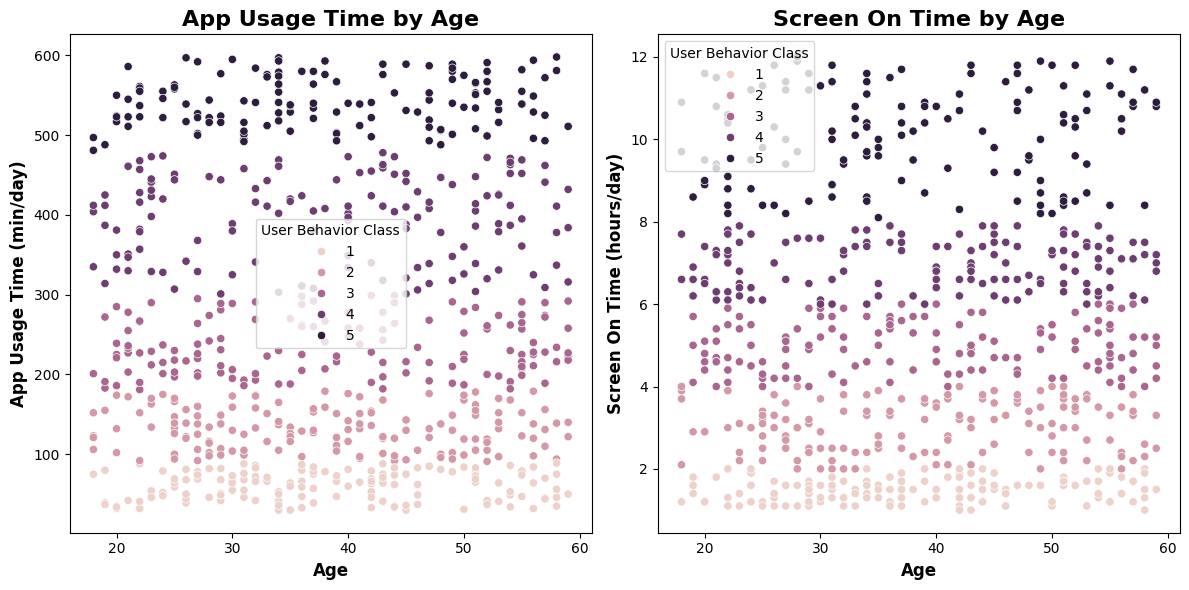

In [ ]:
# 2. Age-wise analysis: App Usage Time and Screen On Time by Age
plt.figure(figsize=(12, 6))

# Scatter plot of App Usage Time by Age
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='App Usage Time (min/day)', hue='User Behavior Class', data=data)
plt.title('App Usage Time by Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('App Usage Time (min/day)', fontsize=12, fontweight='bold')

# Scatter plot of Screen On Time by Age
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Screen On Time (hours/day)', hue='User Behavior Class', data=data)
plt.title('Screen On Time by Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Screen On Time (hours/day)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


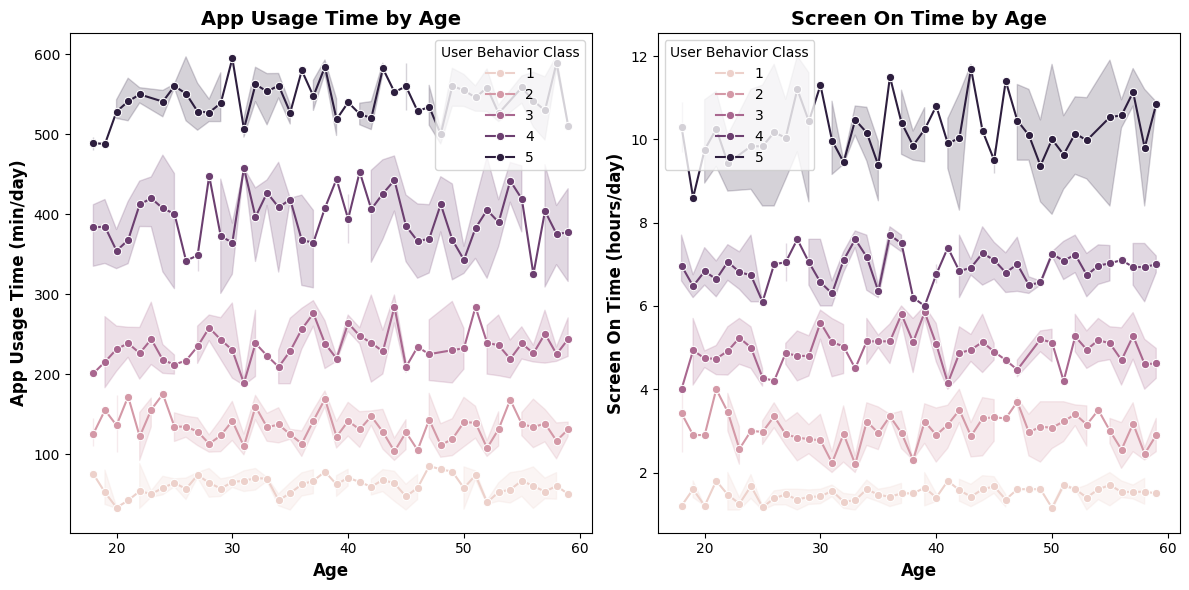

In [ ]:
# 2. Age-wise analysis: App Usage Time and Screen On Time by Age
plt.figure(figsize=(12, 6))

# Line plot of App Usage Time by Age
plt.subplot(1, 2, 1)
sns.lineplot(x='Age', y='App Usage Time (min/day)', hue='User Behavior Class', data=data, marker='o')
plt.title('App Usage Time by Age', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('App Usage Time (min/day)', fontsize=12, fontweight='bold')

# Line plot of Screen On Time by Age
plt.subplot(1, 2, 2)
sns.lineplot(x='Age', y='Screen On Time (hours/day)', hue='User Behavior Class', data=data, marker='o')
plt.title('Screen On Time by Age', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Screen On Time (hours/day)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


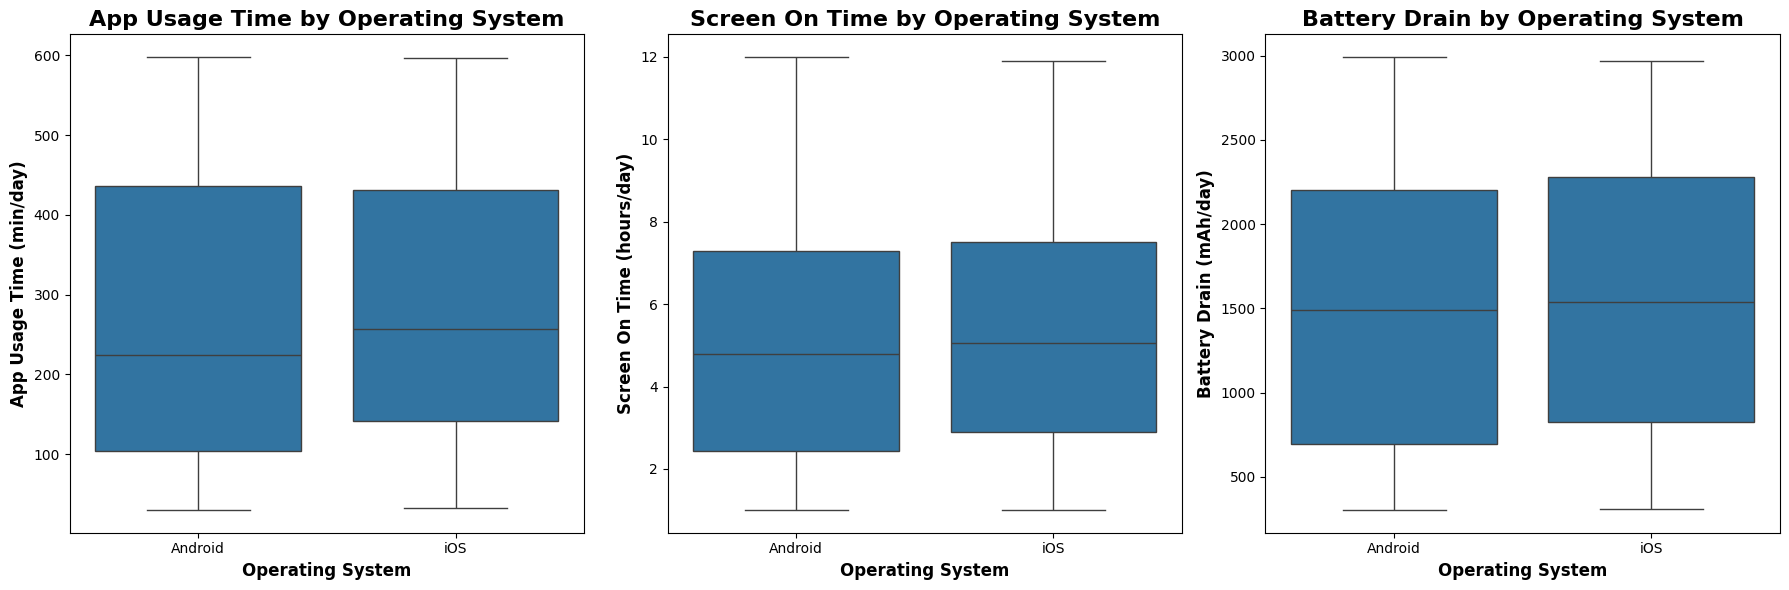

In [ ]:
# 3. Device Model Comparison (Android vs iOS) - Box Plots
plt.figure(figsize=(18, 6))  # Set figure size for better spacing

# Boxplot of App Usage Time by Operating System
plt.subplot(1, 3, 1)
sns.boxplot(x='Operating System', y='App Usage Time (min/day)', data=data)
plt.title('App Usage Time by Operating System', fontsize=16, fontweight='bold')
plt.xlabel('Operating System', fontsize=12, fontweight='bold')
plt.ylabel('App Usage Time (min/day)', fontsize=12, fontweight='bold')

# Boxplot of Screen On Time by Operating System
plt.subplot(1, 3, 2)
sns.boxplot(x='Operating System', y='Screen On Time (hours/day)', data=data)
plt.title('Screen On Time by Operating System', fontsize=16, fontweight='bold')
plt.xlabel('Operating System', fontsize=12, fontweight='bold')
plt.ylabel('Screen On Time (hours/day)', fontsize=12, fontweight='bold')

# Boxplot of Battery Drain by Operating System
plt.subplot(1, 3, 3)
sns.boxplot(x='Operating System', y='Battery Drain (mAh/day)', data=data)
plt.title('Battery Drain by Operating System', fontsize=16, fontweight='bold')
plt.xlabel('Operating System', fontsize=12, fontweight='bold')
plt.ylabel('Battery Drain (mAh/day)', fontsize=12, fontweight='bold')


plt.tight_layout()
plt.show()


<ipython-input-10-16d00701ba10>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Operating System', y='App Usage Time (min/day)', data=data, ci=None)  # ci=None removes error bars
<ipython-input-10-16d00701ba10>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Operating System', y='Screen On Time (hours/day)', data=data, ci=None)  # ci=None removes error bars
<ipython-input-10-16d00701ba10>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Operating System', y='Battery Drain (mAh/day)', data=data, ci=None)  # ci=None removes error bars


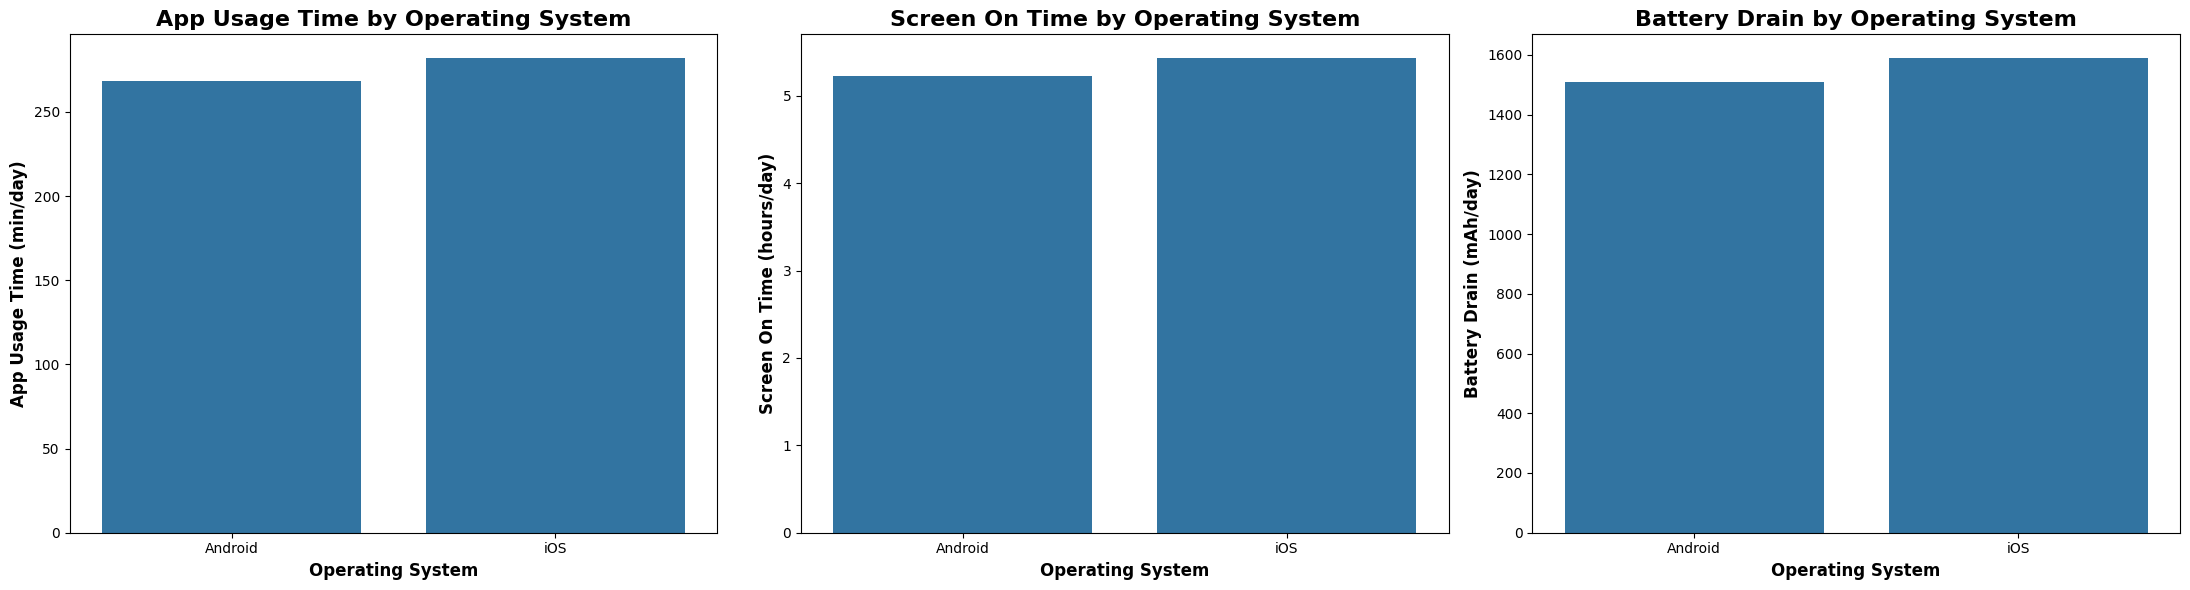

In [ ]:
#Device Model Comparison (Android vs iOS) - Simple Bar Plots
plt.figure(figsize=(22, 6))

# Bar plot of App Usage Time by Operating System
plt.subplot(1, 3, 1)
sns.barplot(x='Operating System', y='App Usage Time (min/day)', data=data, ci=None)
plt.title('App Usage Time by Operating System', fontsize=16, fontweight='bold')
plt.xlabel('Operating System', fontsize=12, fontweight='bold')
plt.ylabel('App Usage Time (min/day)', fontsize=12, fontweight='bold')

# Bar plot of Screen On Time by Operating System
plt.subplot(1, 3, 2)
sns.barplot(x='Operating System', y='Screen On Time (hours/day)', data=data, ci=None)
plt.title('Screen On Time by Operating System', fontsize=16, fontweight='bold')
plt.xlabel('Operating System', fontsize=12, fontweight='bold')
plt.ylabel('Screen On Time (hours/day)', fontsize=12, fontweight='bold')

# Bar plot of Battery Drain by Operating System
plt.subplot(1, 3, 3)
sns.barplot(x='Operating System', y='Battery Drain (mAh/day)', data=data, ci=None)
plt.title('Battery Drain by Operating System', fontsize=16, fontweight='bold')
plt.xlabel('Operating System', fontsize=12, fontweight='bold')
plt.ylabel('Battery Drain (mAh/day)', fontsize=12, fontweight='bold')


plt.subplots_adjust(wspace=0.4)

plt.tight_layout()
plt.show()


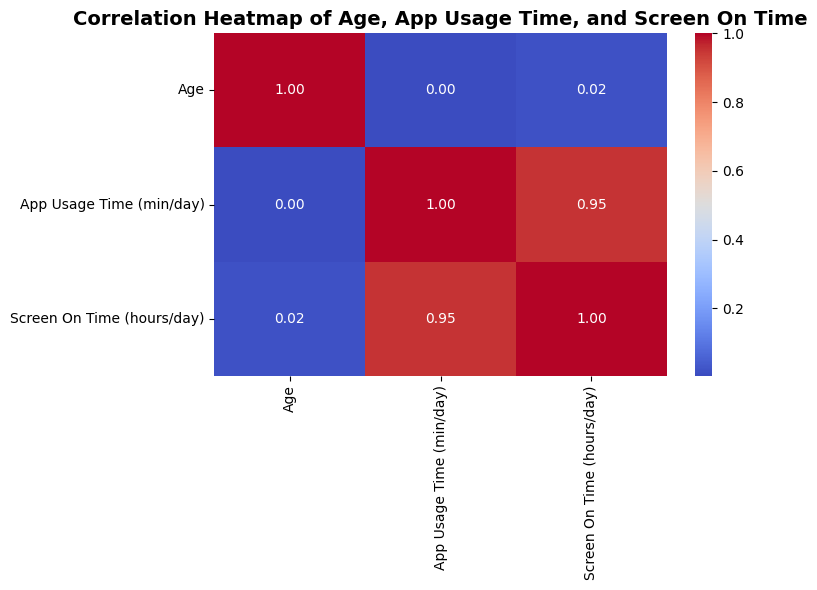

In [ ]:
# Correlation Heatmap: Age, App Usage Time, and Screen On Time
plt.figure(figsize=(8, 6))

# Selecting relevant columns
corr_data = data[['Age', 'App Usage Time (min/day)', 'Screen On Time (hours/day)']]

# Compute the correlation matrix
corr_matrix = corr_data.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Age, App Usage Time, and Screen On Time', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


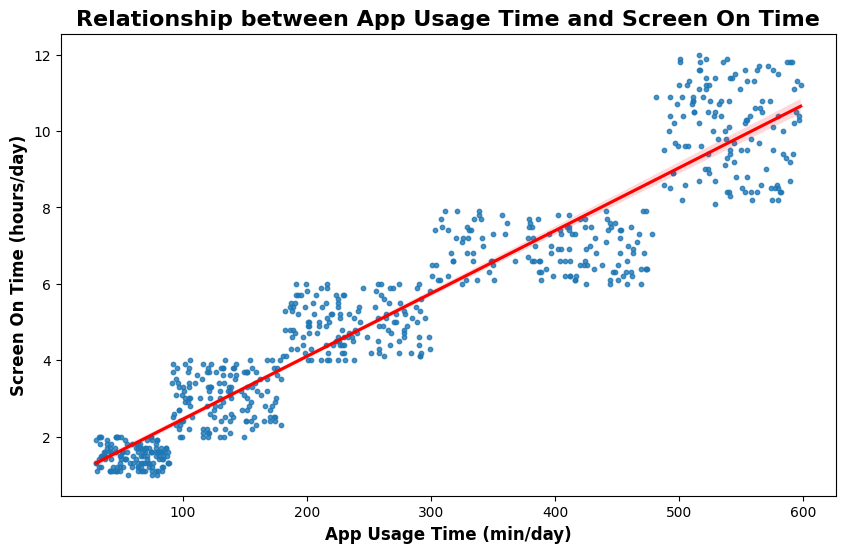

In [ ]:
# Scatter plot with regression line to visualize the relationship between App Usage Time and Screen On Time
plt.figure(figsize=(10, 6))
sns.regplot(x='App Usage Time (min/day)', y='Screen On Time (hours/day)', data=data, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('Relationship between App Usage Time and Screen On Time', fontsize=16, fontweight='bold')
plt.xlabel('App Usage Time (min/day)', fontsize=12, fontweight='bold')
plt.ylabel('Screen On Time (hours/day)', fontsize=12, fontweight='bold')
plt.show()


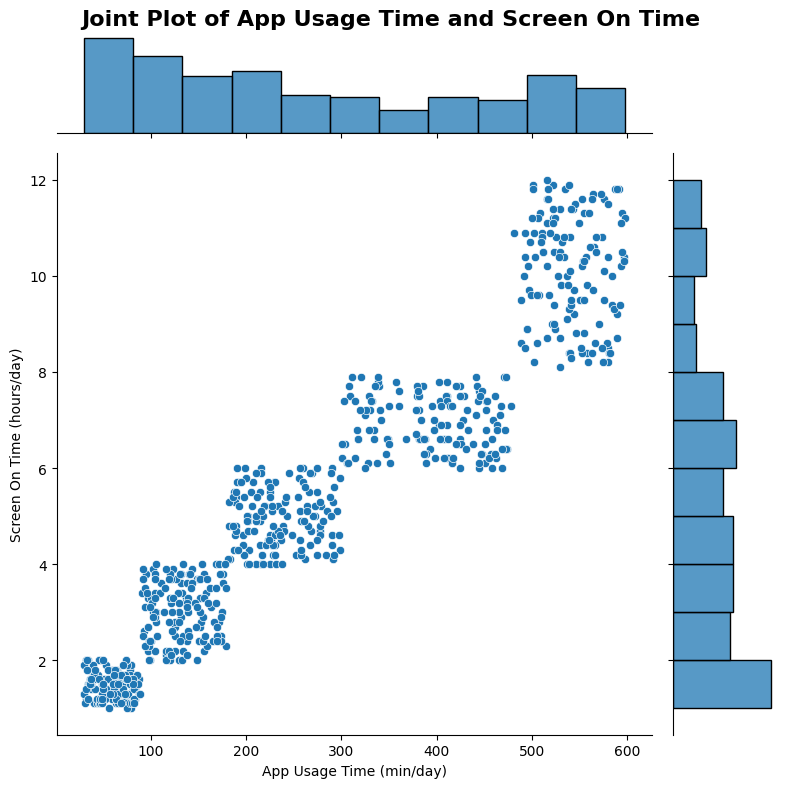

In [ ]:
# Joint plot to visualize the relationship and distributions of App Usage Time and Screen On Time
sns.jointplot(x='App Usage Time (min/day)', y='Screen On Time (hours/day)', data=data, kind='scatter', height=8)
plt.suptitle('Joint Plot of App Usage Time and Screen On Time', fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust to prevent title overlap
plt.show()


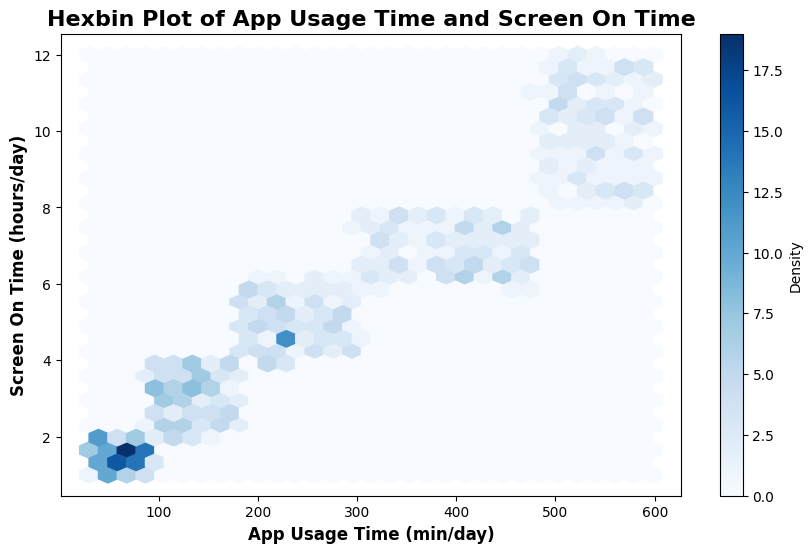

In [ ]:
# Hexbin plot to visualize the density between App Usage Time and Screen On Time
plt.figure(figsize=(10, 6))
plt.hexbin(data['App Usage Time (min/day)'], data['Screen On Time (hours/day)'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.title('Hexbin Plot of App Usage Time and Screen On Time', fontsize=16, fontweight='bold')
plt.xlabel('App Usage Time (min/day)', fontsize=12, fontweight='bold')
plt.ylabel('Screen On Time (hours/day)', fontsize=12, fontweight='bold')
plt.show()


#User Behaviour Class

The goal of the user behavior classification model is to predict the user behavior class (ranging from light to extreme usage) based on mobile usage patterns. By leveraging features such as app usage time, screen-on time, battery drain, and user demographics, classification algorithms aim to accurately identify distinct user behavior types.

In [ ]:
# Convert target variable 'User Behavior Class' into numeric
y = data['User Behavior Class']



In [ ]:
# Select input features
X = data[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
          'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender', 'Device Model', 'Operating System']]


In [ ]:

# Encode categorical variables (Device Model, Operating System, Gender)
X = pd.get_dummies(X, columns=['Device Model', 'Operating System'], drop_first=True)
le_gender = LabelEncoder()
X['Gender'] = le_gender.fit_transform(X['Gender'])


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model: Accuracy, F1 Score, and Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')



Accuracy: 1.00
F1 Score: 1.00


In [ ]:
# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 33]]


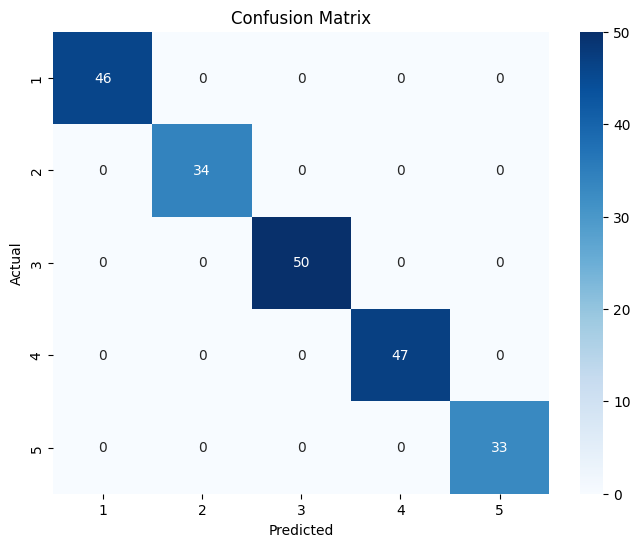

In [ ]:

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



#App Usage Time Prediction

The goal is to predict the daily app usage time of users using features such as screen-on time, battery drain, number of apps installed, data usage, age, gender, and operating system.

In [ ]:
# Select input features and target variable
X = data[['Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed',
          'Data Usage (MB/day)', 'Age', 'Gender', 'Operating System']]
y = data['App Usage Time (min/day)']  # Target variable


In [ ]:
# Encode categorical variables (Gender, Operating System)
X = pd.get_dummies(X, columns=['Operating System'], drop_first=True)
le_gender = LabelEncoder()
X['Gender'] = le_gender.fit_transform(X['Gender'])



In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize models
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)


In [ ]:
# Train models
lin_reg.fit(X_train_scaled, y_train)
tree_reg.fit(X_train, y_train)  # Decision Tree doesn't need scaling


DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_tree = tree_reg.predict(X_test)

# Evaluate models
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

In [ ]:

# Print results for Linear Regression
print(f"Linear Regression - MSE: {mse_lin:.2f}, R²: {r2_lin:.2f}")

# Print results for Decision Tree Regressor
print(f"Decision Tree Regressor - MSE: {mse_tree:.2f}, R²: {r2_tree:.2f}")

Linear Regression - MSE: 1974.83, R²: 0.93
Decision Tree Regressor - MSE: 2613.91, R²: 0.91


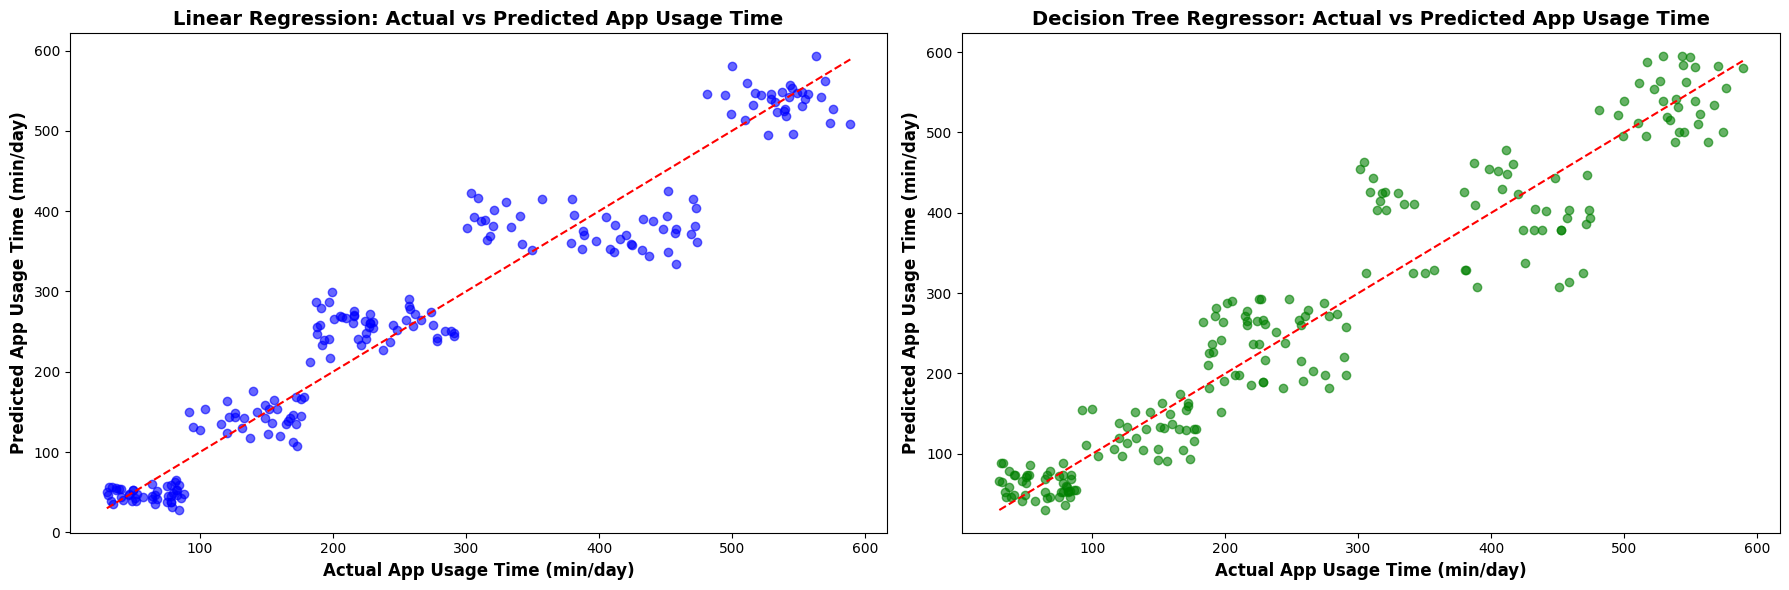

In [ ]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot Predicted vs Actual for Linear Regression
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.title('Linear Regression: Actual vs Predicted App Usage Time', fontsize=14, fontweight='bold')
plt.xlabel('Actual App Usage Time (min/day)', fontsize=12, fontweight='bold')
plt.ylabel('Predicted App Usage Time (min/day)', fontsize=12, fontweight='bold')

# Plot Predicted vs Actual for Decision Tree Regressor
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tree, alpha=0.6, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.title('Decision Tree Regressor: Actual vs Predicted App Usage Time', fontsize=14, fontweight='bold')
plt.xlabel('Actual App Usage Time (min/day)', fontsize=12, fontweight='bold')
plt.ylabel('Predicted App Usage Time (min/day)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#Clustering Users Based on Behavior

The goal is to group users with similar mobile usage patterns using K-Means clustering and visualize the clusters using Principal Component Analysis (PCA) for dimensionality reduction.

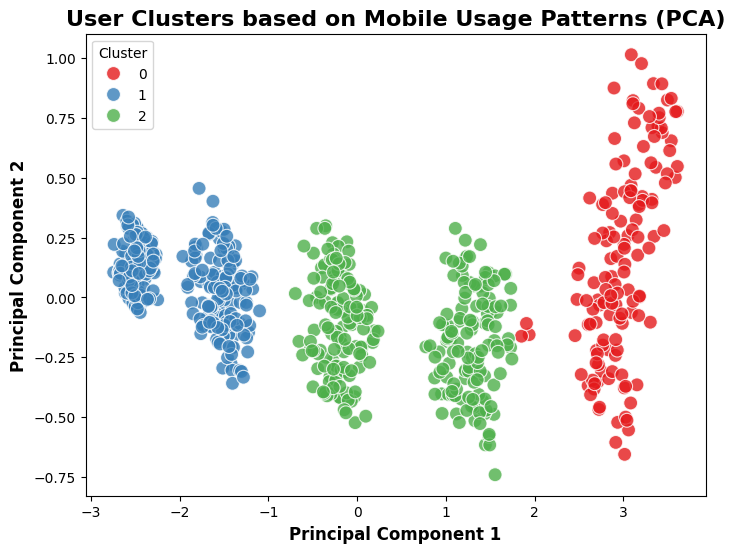

In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Select features for clustering
X = data[['App Usage Time (min/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Number of Apps Installed']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_

# Use PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize clusters using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='Set1', s=100, alpha=0.8)
plt.title('User Clusters based on Mobile Usage Patterns (PCA)', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=12, fontweight='bold')
plt.ylabel('Principal Component 2', fontsize=12, fontweight='bold')
plt.legend(title='Cluster')
plt.show()
